# Selecting Principal colors of an Image

**12210357 徐婧珺**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler
import pca
import linear_autoencoder as lae
import soft_kmeans as skm
import importlib

importlib.reload(pca)
importlib.reload(lae)
importlib.reload(skm)

<module 'soft_kmeans' from '/mnt/e/桌面/专业学习/SIM207/final_project/code/soft_kmeans.py'>

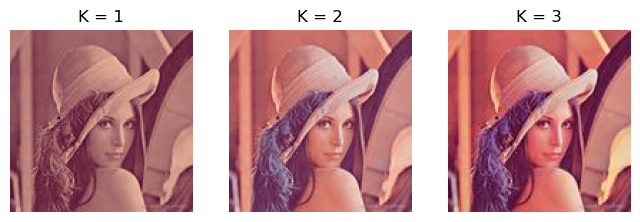

In [2]:
def PCA_principal_colors(img, feature_num):
    # 送进来的就是直接通过mping.imread读取的三维数组
    # 处理图片数据使得它成为两维的
    img_2d = img.reshape(-1, 3)
    # 对图片数据进行标准化，使得恢复出来的图片质量更高
    scaler = StandardScaler()
    img_2d_scaled = scaler.fit_transform(img_2d)
    # 构建PCA模型
    PCAmodel = pca.PCA(feature_num)
    # 获取主要的feature_num维度的数据
    PCAmodel.fit(img_2d_scaled)
    img_pca = PCAmodel.transform(img_2d_scaled)
    # 使用降维的数据重建图像
    img_restored_scaled = PCAmodel.inverse_transform(img_pca)
    img_restored_scaled = np.real(img_restored_scaled)
    # 反向标准化
    img_restored = scaler.inverse_transform(img_restored_scaled)
    # 确保数据类型正确
    if img_restored.dtype.kind == 'f':  # 检查数据是否为浮点类型
        # 如果是浮点类型，归一化到 [0.0, 1.0]
        img_restored = (img_restored - img_restored.min()) / (img_restored.max() - img_restored.min())
    elif img_restored.dtype.kind == 'i':  # 检查数据是否为整数类型
        # 如果是整数类型，确保值在 [0, 255]
        img_restored = np.clip(img_restored, 0, 255)
    # 将二维数组转换回原始图像的形状
    img_restored = img_restored.reshape(img.shape)
    return img_restored

img_ch3 = mpimg.imread('input_image_ch3_128.jpg')
img_ch3_restored_1 = PCA_principal_colors(img_ch3, 1)
img_ch3_restored_2 = PCA_principal_colors(img_ch3, 2)

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_ch3_restored_1)
plt.title('K = 1')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(img_ch3_restored_2)
plt.title('K = 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_ch3)
plt.title('K = 3')
plt.axis('off')

plt.show()

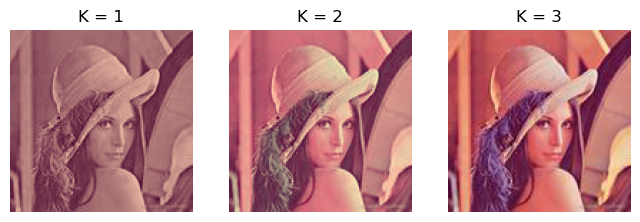

In [4]:
def LinearAutoEncoder_principal_colors(img, feature_num, epoch_num, learning_rate, gray = False, tol = None):
    # 送进来的就是直接通过mping.imread读取的三维数组
    # 处理图片数据使得它成为两维的
    img_2d = img.reshape(-1, 3)
    # 对图片数据进行标准化，使得恢复出来的图片质量更高
    scaler = StandardScaler()
    img_2d_scaled = scaler.fit_transform(img_2d)
    # 构建linear_encoder模型
    LAEmodel = lae.LinearAutoEncoder(img_2d_scaled.shape[1], feature_num)
    # 获取主要的feature_num维度的数据
    LAEmodel.fit(img_2d_scaled, epoch_num, learning_rate, tol)
    # 看看训练的效果qwq
    # LAEmodel.plot_loss()
    img_lae = LAEmodel.transform(img_2d_scaled)
    # 使用降维的数据重建图像
    img_restored_scaled = LAEmodel.predict(img_lae)
    img_restored_scaled = np.real(img_restored_scaled)
    # 反向标准化
    img_restored = scaler.inverse_transform(img_restored_scaled)
    # 确保数据类型正确
    if img_restored.dtype.kind == 'f':  # 检查数据是否为浮点类型
        # 如果是浮点类型，归一化到 [0.0, 1.0]
        img_restored = (img_restored - img_restored.min()) / (img_restored.max() - img_restored.min())
    elif img_restored.dtype.kind == 'i':  # 检查数据是否为整数类型
        # 如果是整数类型，确保值在 [0, 255]
        img_restored = np.clip(img_restored, 0, 255)
    # 将二维数组转换回原始图像的形状
    img_restored = img_restored.reshape(img.shape)
    # 灰度图处理
    if gray:
        weights = np.array([0.2989, 0.5870, 0.1140])
        img_restored = np.dot(img_restored[...,:3], weights)
    return img_restored

img_ch3 = mpimg.imread('input_image_ch3_128.jpg')
img_ch3_restored_1 = LinearAutoEncoder_principal_colors(img_ch3, 1, epoch_num= 10000, learning_rate = 0.002, gray = False, tol = None)
img_ch3_restored_2 = LinearAutoEncoder_principal_colors(img_ch3, 2, epoch_num= 10000, learning_rate = 0.0006, gray = False, tol = None)

plt.figure(figsize=(8, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_ch3_restored_1)
plt.title('K = 1')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(img_ch3_restored_2)
plt.title('K = 2')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_ch3)
plt.title('K = 3')
plt.axis('off')

plt.show()

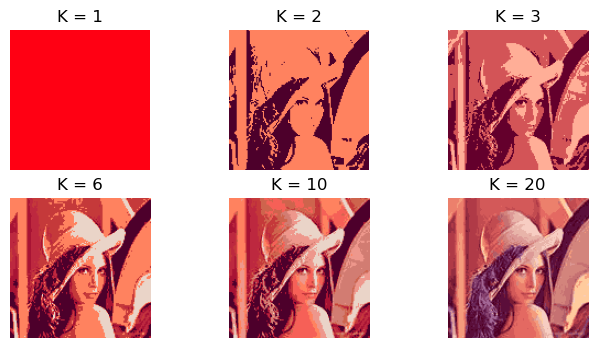

In [66]:
def SoftKmeans_principal_colors(img, feature_num, epoch_num, beta, init_type, tol, random_state, gray):
    # 送进来的就是直接通过mping.imread读取的三维数组
    # 处理图片数据使得它成为两维的
    img_2d = img.reshape(-1, 3)
    # 构建Soft_kmeans模型
    SKMmodel = skm.SoftKMeans(feature_num, epoch_num, beta, tol, random_state)
    # 获取主要的feature_num维度的数据
    SKMmodel.fit(img_2d, init_type)
    assignments = SKMmodel.predict(img_2d)
    centroids = SKMmodel.return_centroids()
    img_restored = centroids[assignments - 1]
    # 确保数据类型正确
    if img_restored.dtype.kind == 'f':  # 检查数据是否为浮点类型
        # 如果是浮点类型，归一化到 [0.0, 1.0]
        img_restored = (img_restored - img_restored.min()) / (img_restored.max() - img_restored.min())
    elif img_restored.dtype.kind == 'i':  # 检查数据是否为整数类型
        # 如果是整数类型，确保值在 [0, 255]
        img_restored = np.clip(img_restored, 0, 255)
    # 将二维数组转换回原始图像的形状
    img_restored = img_restored.reshape(img.shape)
    # 灰度图处理
    if gray:
        weights = np.array([0.2989, 0.5870, 0.1140])
        img_restored = np.dot(img_restored[...,:3], weights)
    return img_restored

img_ch3_restored_1 = SoftKmeans_principal_colors(img_ch3, 1, epoch_num= 10000, beta = 1, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_2 = SoftKmeans_principal_colors(img_ch3, 2, epoch_num= 10000, beta = 1, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_3 = SoftKmeans_principal_colors(img_ch3, 3, epoch_num= 10000, beta = 1, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_6 = SoftKmeans_principal_colors(img_ch3, 6, epoch_num= 10000, beta = 1, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_10 = SoftKmeans_principal_colors(img_ch3, 10, epoch_num= 10000, beta = 1, init_type = 2, tol = 1e-20, random_state = 100, gray = False)
img_ch3_restored_20 = SoftKmeans_principal_colors(img_ch3, 20, epoch_num= 10000, beta = 1, init_type = 2, tol = 1e-20, random_state = 100, gray = False)

plt.figure(figsize=(8, 4))

plt.subplot(2, 3, 1)
plt.imshow(img_ch3_restored_1)
plt.title('K = 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(img_ch3_restored_2)
plt.title('K = 2')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(img_ch3_restored_3)
plt.title('K = 3')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(img_ch3_restored_6)
plt.title('K = 6')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(img_ch3_restored_10)
plt.title('K = 10')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(img_ch3_restored_20)
plt.title('K = 20')
plt.axis('off')

plt.show()